In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

(0) Load

In [2]:
file = '/Users/robertpinochetgomez/GitHub/01-linear-regression/01-datasets/auto-mpg.parquet'

df_auto = pd.read_parquet(file)

print(df_auto.info())
df_auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


(1) Predictive Multiple Linear Regression Model 

In [3]:
df_auto = df_auto.dropna()

# Select predictors and target
X = df_auto[['horsepower', 'weight']]
y = df_auto['mpg']

# Optional: check for NaNs
print(X.isnull().sum())
print(y.isnull().sum())

horsepower    0
weight        0
dtype: int64
0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Feature names:", X.columns.tolist())

Intercept: 46.58674143899789
Coefficients: [-0.05214672 -0.00587153]
Feature names: ['horsepower', 'weight']


In [5]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))

Mean Squared Error (MSE): 17.79177611283814
R-squared: 0.6514190280854428
Root Mean Squared Error (RMSE): 4.218029885247156


In [6]:
# Predict any value
# Example: horsepower = 120, weight = 3000
new_data = pd.DataFrame({'horsepower': [120], 'weight': [3000]})
predicted_mpg = model.predict(new_data)

print("Predicted MPG:", predicted_mpg[0])

Predicted MPG: 22.714531705689247


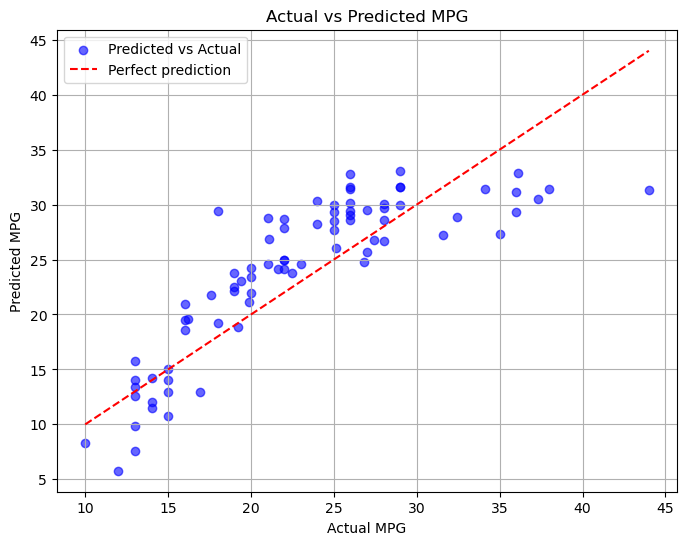

In [7]:
comparison_df = pd.DataFrame({
    'Actual MPG': y_test,
    'Predicted MPG': y_pred
})

plt.figure(figsize=(8,6))

# Scatter plot of Actual vs Predicted MPG
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect prediction')

plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.legend()
plt.grid(True)
plt.show()

(2) Feature Engineering

In [8]:
df_auto = df_auto.dropna()

# Select predictors and target
X = np.log(df_auto[['horsepower', 'weight']])
y = np.log(df_auto['mpg'])

# Optional: check for NaNs
print(X.isnull().sum())
print(y.isnull().sum())

horsepower    0
weight        0
dtype: int64
0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_fe = LinearRegression()
model_fe.fit(X_train, y_train)

print("Intercept:", model_fe.intercept_)
print("Coefficients:", model_fe.coef_)
print("Feature names:", X.columns.tolist())

Intercept: 10.193619462963413
Coefficients: [-0.37887655 -0.67207872]
Feature names: ['horsepower', 'weight']


In [10]:
y_pred = model_fe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", np.sqrt(np.exp(mse)))

Mean Squared Error (MSE): 0.021871852040353617
R-squared: 0.7855958569093493
Root Mean Squared Error (RMSE): 1.0109959418357874


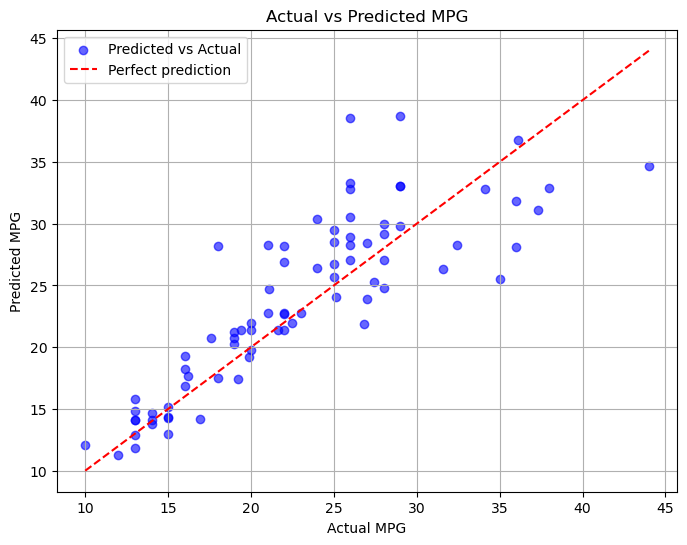

In [11]:
comparison_df = pd.DataFrame({
    'Actual MPG': y_test,
    'Predicted MPG': y_pred
})

plt.figure(figsize=(8,6))

y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

# Scatter plot of Actual vs Predicted MPG
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect prediction')

plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.legend()
plt.grid(True)
plt.show()

(3) Conclusion

Para hacer el modelo de regresión lineal más preciso, sirvió de la hipótesis la forma de la función. En este caso, dado que las variables poseen una forma exponencial, se aplicó su logaritmo para llevarlo a una lineal. Lo cual hizo aumentar el R2 a un 79% y apróximadamente 1 en RMSE (volviendo a llevarlo a exponencial). 